# Подготовка окружения

In [38]:
pip install bootstrapped

  Created wheel for bootstrapped: filename=bootstrapped-0.0.2-py2.py3-none-any.whl size=13954 sha256=26f158710c544d198ea171534d15e0ef4bb078ff80a7008c52feb34d8ef57f78
  Stored in directory: /root/.cache/pip/wheels/15/55/6a/9a722f067ac4c3dfab359ed2ec7906b9cc6649156d9886bd59
Successfully built bootstrapped


In [12]:
#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.proportion as proportion
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.stats.power as smp
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-окружения" data-toc-modified-id="Подготовка-окружения-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка окружения</a></span></li><li><span><a href="#Описание-задачи" data-toc-modified-id="Описание-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание задачи</a></span><ul class="toc-item"><li><span><a href="#Посмотрим-на-исторические-данные" data-toc-modified-id="Посмотрим-на-исторические-данные-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим на исторические данные</a></span></li><li><span><a href="#Исследовательская-часть.-Посмотрим-распределение-пользователей-по-группам-по-основным-сегментам" data-toc-modified-id="Исследовательская-часть.-Посмотрим-распределение-пользователей-по-группам-по-основным-сегментам-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследовательская часть. Посмотрим распределение пользователей по группам по основным сегментам</a></span></li><li><span><a href="#Статистическая-проверка-гиппотез" data-toc-modified-id="Статистическая-проверка-гиппотез-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Статистическая проверка гиппотез</a></span></li><li><span><a href="#Вычислим-мощность-теста" data-toc-modified-id="Вычислим-мощность-теста-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вычислим мощность теста</a></span></li><li><span><a href="#Оценим-влияние-теста-на-средний-чек" data-toc-modified-id="Оценим-влияние-теста-на-средний-чек-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Оценим влияние теста на средний чек</a></span><ul class="toc-item"><li><span><a href="#Подготовим-данные-для-расчета:" data-toc-modified-id="Подготовим-данные-для-расчета:-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Подготовим данные для расчета:</a></span></li><li><span><a href="#Посчитаем-разницу:" data-toc-modified-id="Посчитаем-разницу:-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Посчитаем разницу:</a></span></li><li><span><a href="#Границы-доверительного-интервала:" data-toc-modified-id="Границы-доверительного-интервала:-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Границы доверительного интервала:</a></span></li><li><span><a href="#Построим-распределение-разниц-среднего-чека:" data-toc-modified-id="Построим-распределение-разниц-среднего-чека:-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>Построим распределение разниц среднего чека:</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

# Описание задачи



*1. `Бизнес-проблема:`* мы считаем, что конверсии из визита в покупку в нашем магазине недостаточно высоки. Мы посмотрели на страницы конкурентов и поняли, что у нас есть возможность увеличить объем продаж, если мы еще немного изменим дизайн страницы с каталогом продукции. 

*2. `Гипотеза:`* предполагается, что добавление видео с процессом приготовления вкусностей мотивирует к их покупке и позволяет добиться двух эффектов:
   * повышение конверсии из визита в оплату (больше людей захотят купить нашу продукцию)
   * как минимум, не снижение среднего чека покупки, а в идеале — увеличение
    
*3. `Ожидаемые действия пользователей:`* мы ожидаем, что, увидев видео с процессом приготовления вкусностей вместе с описанием продукции, больше людей захотят сделать покупку, а возможно — в среднем будут покупать больше продукции в одном заказе.

*4. `Эксперимент будет считаться успешным, если:`*
   * конверсия из визита в покупку с окном в 7 дней повысится
   * средний чек покупки не снизится

## Посмотрим на исторические данные

In [2]:
historical_data = pd.read_csv('investigate_window.csv', parse_dates = [2,3] , index_col=0)  

In [3]:
historical_data.head()

,user_id,main_page_viewed_at,order_completed_at,time_to_order
0,959238,2020-11-20 23:55:02.759000+00:00,2020-11-30 02:22:32.759000+00:00,9.102431
1,337366,2020-12-05 23:41:42.244000+00:00,2020-12-12 22:25:52.244000+00:00,6.947338
2,259956,2020-11-20 23:33:53.269000+00:00,2020-11-25 13:08:03.269000+00:00,4.565394
3,534280,2020-11-28 23:44:56.556000+00:00,2020-12-05 10:14:06.556000+00:00,6.436921
4,795121,2020-11-18 23:59:56.236000+00:00,2020-11-27 02:38:16.236000+00:00,8.109954


**Посмотрим 95, 90 и 85 перцентили для наших данных с помощью колонки time_to_order.**

In [4]:
np.percentile(historical_data['time_to_order'], [85, 90, 95])
#7-ми дневное окно:
perc95=round(np.percentile(historical_data['time_to_order'], [85, 90, 95])[2], 1)
perc95

7.1

**Посмотрим гистограмму распределения времени между первым заходом на сайт и покупкой.** 

<Figure size 864x432 with 0 Axes>

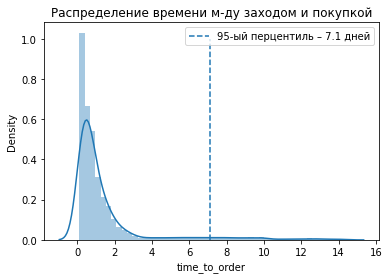

<Figure size 864x432 with 0 Axes>

In [13]:
fig, ax = plt.subplots() 
ax.set_title('Распределение времени м-ду заходом и покупкой')
ax=sns.distplot(historical_data['time_to_order'])
plt.vlines(perc95, ymin = 0, ymax = 1, linestyles = 'dashed', label = f'95-ый перцентиль – {perc95} дней')
plt.legend()
plt.figure(figsize=(12,6))


## Исследовательская часть. Посмотрим распределение пользователей по группам по основным сегментам 

In [6]:
# Возьмем уже обрезанный фрейм с 7 дневным окном
data=pd.read_csv('bakery_ab_test.csv', index_col=0)
data

,user_id,test_group,purchase_amount,geo_group,acquisition_channel,within_window,platform
1,3738,test,306.639511,regions,target_direct,1,pc
2,3755,control,NaN,regions,target_direct,0,pc
3,3772,test,NaN,regions,context_brand,0,mobile
4,3789,control,NaN,spb,target_direct,0,pc
5,3806,test,NaN,regions,social_media,0,pc
...,...,...,...,...,...,...,...
152995,2604636,test,NaN,regions,target_direct,0,pc
152996,2604653,control,5236.818309,regions,organic,1,mobile
152997,2604670,control,NaN,regions,target_direct,0,pc
152998,2604687,control,101.783032,regions,target_direct,1,pc


<Figure size 864x432 with 0 Axes>

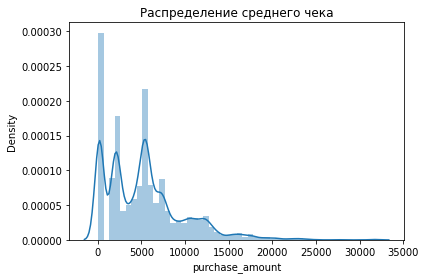

<Figure size 864x432 with 0 Axes>

In [14]:
fig, ax = plt.subplots() 
ax.set_title('Распределение среднего чека')
ax=sns.distplot(data['purchase_amount'])
plt.figure(figsize=(12,6))


***Распределение у нас не нормальное, учтем этот момент в дальнейшем ***


In [13]:
data['purchase_amount'] = data['purchase_amount'].astype('float32')

**Построим распределение по группам и сегментам.**


In [99]:
def plot_segments_distribution(df, segment_columns, test_factor):
    
    for segment in segment_columns:
        aggregated_data = df.groupby(by = [test_factor, segment])['user_id'].count().reset_index()
        sns.catplot(x = segment, 
                    y = 'user_id', 
                    hue = test_factor, # сообщаем, что хотим, чтобы разные группы имели разный цвет
                    data = aggregated_data, 
                    kind = "bar", 
                    height = 4,
                    aspect = 1.5,
                    palette='crest') # задаем размер графика 

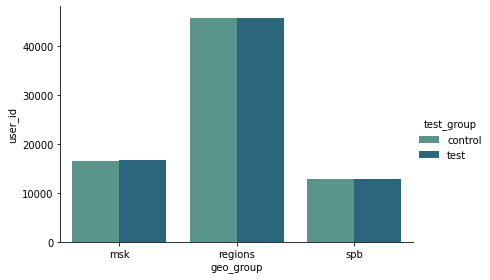

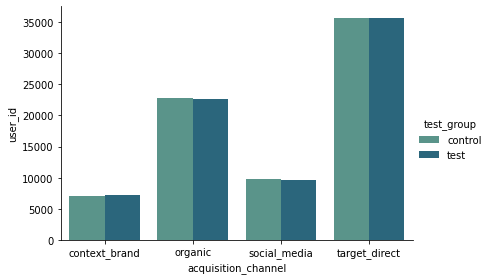

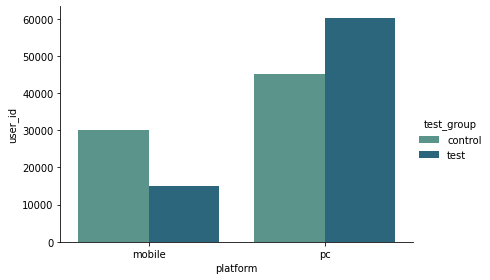

In [100]:
plot_segments_distribution(data,['geo_group', 'acquisition_channel', 'platform'], 'test_group')

In [17]:
#Посчитаем значимые метрики
metrics=data.groupby(['platform','test_group'], as_index= False).agg({'user_id':'nunique', 'within_window':'sum', 'purchase_amount':'mean'})
metrics['conversion']=round(metrics['within_window']/metrics['user_id'],3)
metrics

,platform,test_group,user_id,within_window,purchase_amount,conversion
0,mobile,control,30098,9266,5127.505371,0.308
1,mobile,test,14956,4768,5369.075684,0.319
2,pc,control,45112,13732,5200.121582,0.304
3,pc,test,60317,19659,5401.003906,0.326


***Есть различие в распределении по платформам и группам теста по кол-ву пользователей.***

**Есть разница в конверсиях и среднем чеке в положительную сторону, но не кажется большой на первый взгляд, вглянем подробнее ***


## Статистическая проверка гиппотез

Мы не можем исправить данные, но можем проанализировать общие результаты и сравнить их с результатами для пользователей, зашедших с разных платформ, чтобы уменьшить риск принятия ошибочного решения. Поэтому дальше мы будем анализировать параллельно 3 теста:

1. Все пользователи, попавшие в тест
2. Пользователи, заходившие с ПК `platform = 'pc'`
3. Пользователи, заходившие с мобильного `platform = 'mobile'`

**H0- Различий в конверсии нет**

**H1- Различия в конверсии есть**

###Подготовим данные для проверки:

In [18]:
#Общая проврека
metrics = data.groupby('test_group', as_index= False).agg({'user_id':'nunique', 'within_window':'sum','purchase_amount':'mean' })
metrics['conversion']=round(metrics['within_window']/metrics['user_id'],3)
metrics

,test_group,user_id,within_window,purchase_amount,conversion
0,control,75210,22998,5170.864258,0.306
1,test,75273,24427,5394.771484,0.325


In [19]:
#ПК проврека
metrics_pc = data[data['platform']=='pc'].groupby('test_group', as_index= False).agg({'user_id':'nunique', 'within_window':'sum', 'purchase_amount':'mean'})
metrics_pc['conversion']=round(metrics_pc['within_window']/metrics_pc['user_id'],3)
metrics_pc

,test_group,user_id,within_window,purchase_amount,conversion
0,control,45112,13732,5200.121582,0.304
1,test,60317,19659,5401.003906,0.326


In [20]:
#Мобильные устройства проврека
metrics_mobile = data[data['platform']=='mobile'].groupby('test_group', as_index= False).agg({'user_id':'nunique', 'within_window':'sum', 'purchase_amount':'mean'})
metrics_mobile['conversion']=round(metrics_mobile['within_window']/metrics_mobile['user_id'],3)
metrics_mobile

,test_group,user_id,within_window,purchase_amount,conversion
0,control,30098,9266,5127.505371,0.308
1,test,14956,4768,5369.075684,0.319


In [ ]:
#proportions_ztest(metrics['within_window'],metrics['user_id'])[1]

In [22]:
chi2stat, pval, table = proportion.proportions_chisquare(metrics['within_window'], metrics['user_id'])
pval

5.321539863368111e-15

In [23]:
chi2stat_pc, pval_pc, table_pc = proportion.proportions_chisquare(metrics_pc['within_window'], metrics_pc['user_id'])
pval_pc

1.0436637877855105e-13

In [24]:
chi2stat_mobile, pval_mobile, table_mobile = proportion.proportions_chisquare(metrics_mobile['within_window'], metrics_mobile['user_id'])
pval_mobile

0.018202784051985058

In [25]:
#Зададим уровень значимости в 5%
alpha=0.05

In [26]:
for pvalue in [pval,pval_pc,pval_mobile]:
    if pvalue<alpha:
        print('Отвергаем H0 и говорим о о том что есть статистическая разница в конверсиях ', pvalue)
    else:
        print('Не отвергаем H0 и говорим о о том что статистической разницы в конверсиях нет', pvalue )
        

Отвергаем H0 и говорим о о том что есть статистическая разница в конверсиях  5.321539863368111e-15
Отвергаем H0 и говорим о о том что есть статистическая разница в конверсиях  1.0436637877855105e-13
Отвергаем H0 и говорим о о том что есть статистическая разница в конверсиях  0.018202784051985058


***Во всех трех случаях мы отвергли 0 гипотезу, что говорит нам о том, что есть разница в конверсии во всех разрезах***

## Вычислим мощность теста

In [28]:
# напиши здесь код
chipower=smp.GofChisquarePower()


$$ES = \sqrt{(p_0 - p_1)^2/p_o}$$

$p_0$ конверсию в контрольной группе, а $p_1$ — тестовой

In [29]:
# Формула для расчета размера эффекта для 
def chi2_effect_size(p0, p1):
    return np.sqrt(((p0 - p1)**2 / p0))

###Подготовим данные для расчета:

In [30]:
#Общий
conversion_control=metrics[metrics['test_group']=='control']['conversion'].values[0]
conversion_test=metrics[metrics['test_group']=='test']['conversion'].values[0]
nobs=metrics['user_id'].min() #кол-во наблюдений

In [31]:
#ПК
conversion_control_pc = metrics_pc[metrics_pc['test_group']=='control']['conversion'].values[0]
conversion_test_pc = metrics_pc[metrics_pc['test_group']=='test']['conversion'].values[0]
nobs_pc = metrics_pc['user_id'].min() #кол-во наблюдений

In [32]:
#Мобильные устройства
conversion_control_mobile = metrics_mobile[metrics_mobile['test_group']=='control']['conversion'].values[0]
conversion_test_mobile = metrics_mobile[metrics_mobile['test_group']=='test']['conversion'].values[0]
nobs_mobile = metrics_mobile['user_id'].min() #кол-во наблюдений

###Считаем мощность:

In [33]:
power = chipower.solve_power(effect_size=chi2_effect_size(conversion_control, conversion_test),# разница коэффициентов конверсии
                            nobs=nobs,# меньший размер выборки
                            alpha=pval,# значение ошибки первого рода на наших данных
                            power = None)# функция вернет значение, указаное как None
power

0.9452552958994492

In [35]:
pc_power = chipower.solve_power(effect_size=chi2_effect_size(conversion_control_pc, conversion_test_pc),# разница коэффициентов конверсии
                            nobs=nobs_pc,# меньший размер выборки
                            alpha=pval_pc,# значение ошибки первого рода на наших данных
                            power = None)# функция вернет значение, указаное как None
pc_power

0.8507355235487167

In [34]:
mobile_power = chipower.solve_power(effect_size=chi2_effect_size(conversion_control_mobile, conversion_test_mobile),# разница коэффициентов конверсии
                            nobs=nobs_mobile,# меньший размер выборки
                            alpha=pval_mobile,# значение ошибки первого рода на наших данных
                            power = None)# функция вернет значение, указаное как None
mobile_power

0.5249147964236864

***В перых двух проверках мощность более 80% и это хорошо это у нас общий показатель и по ПК, а вот в мобильных устройствах показатель всего лишь 52%, тк. тест уже проведен и необходимо сделать выводы, опустим этот момент***

In [36]:
# Посчитаем для справки необходимый размер выборки для м.у.
power = 0.8 # хотим мощность не меньше 80%

size_of_each_test_group = chipower.solve_power(effect_size = chi2_effect_size(conversion_control_mobile, conversion_test_mobile), 
                                               nobs = None, 
                                               alpha = alpha, 
                                               power = power) 
print('Необходимый размер выборки для эксперимента - {:.0f}'.format(2*size_of_each_test_group))

Необходимый размер выборки для эксперимента - 39958


## Оценим влияние теста на средний чек

### Подготовим данные для расчета:

In [40]:
test = data[data['test_group']=='test']['purchase_amount'].dropna().values
control = data[data['test_group']=='control']['purchase_amount'].dropna().values

test_pc = data[(data['test_group']=='test') &(data['platform']=='pc') ]['purchase_amount'].dropna().values
control_pc = data[(data['test_group']=='control')  &(data['platform']=='pc')]['purchase_amount'].dropna().values

test_mobile = data[(data['test_group']=='test')&(data['platform']=='mobile')]['purchase_amount'].dropna().values
control_mobile = data[(data['test_group']=='control')&(data['platform']=='mobile')]['purchase_amount'].dropna().values

### Посчитаем разницу:

In [41]:
boot =  bs.bootstrap_ab(test = test, ctrl = control
                              , stat_func = bs_stats.mean #проверяем среднее
                              , compare_func = bs_compare.difference #как мы хотим исследовать. В нашем случае — хотим взять разницу между группами
                              , return_distribution=True) # вернем набор разниц, который функция получает в результате всех итераций

In [42]:
boot_pc = bs.bootstrap_ab(test = test_pc, ctrl = control_pc
                              , stat_func = bs_stats.mean #проверяем среднее
                              , compare_func = bs_compare.difference #как мы хотим исследовать. В нашем случае — хотим взять разницу между группами
                              , return_distribution=True) # вернем набор разниц, который функция получает в результате всех итераций

In [43]:
boot_mobile = bs.bootstrap_ab(test = test_mobile, ctrl = control_mobile
                              , stat_func = bs_stats.mean #проверяем среднее
                              , compare_func = bs_compare.difference #как мы хотим исследовать. В нашем случае — хотим взять разницу между группами
                              , return_distribution=True) # вернем набор разниц, который функция получает в результате всех итераций

### Границы доверительного интервала:

In [45]:
borders = np.percentile(boot, [2.5, 97.5]) # считаем перцентили
borders_pc = np.percentile(boot_pc, [2.5, 97.5]) # считаем перцентили
borders_mobile = np.percentile(boot_mobile, [2.5, 97.5]) # считаем перцентили

### Построим распределение разниц среднего чека:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


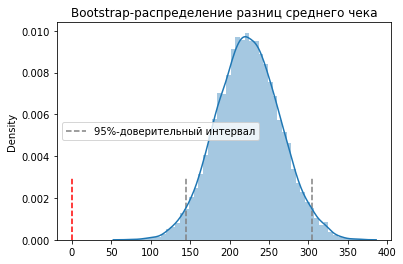

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


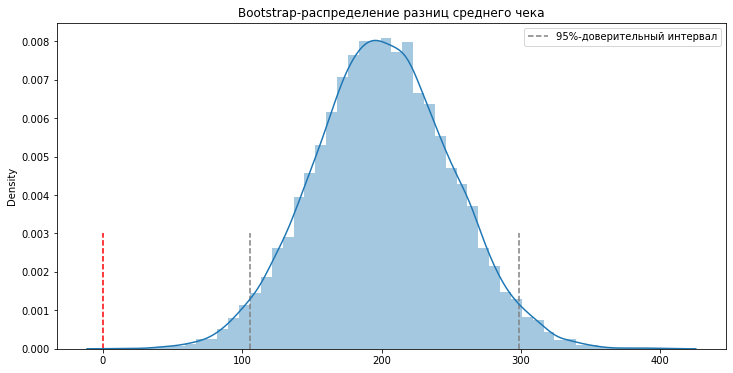

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


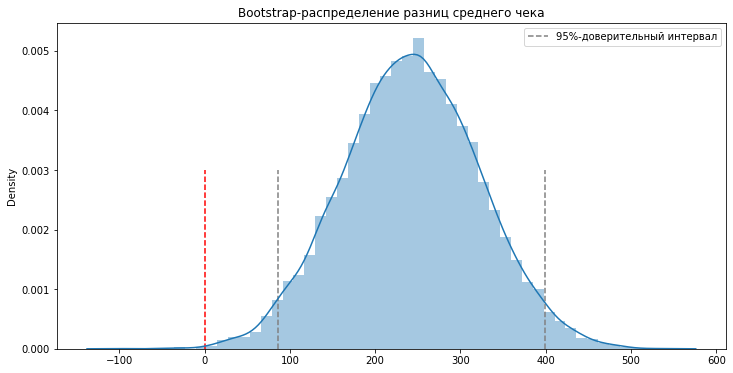

In [48]:
for i,k in zip([boot, boot_pc, boot_mobile],[borders, borders_pc, borders_mobile]):
  sns.distplot(i) # функция построения распределения
  plt.title('Bootstrap-распределение разниц среднего чека', )
  plt.rcParams["figure.figsize"] = (12, 6)
  plt.vlines(0, # отрисуем линию на уровне ноля
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'red')
  plt.vlines(k, # отрисуем перцентили
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'grey', 
           label = '95%-доверительный интервал')
  plt.legend()
  plt.show()

***Во всех трех случаях мы отвергли 0 гипотезу, что говорит нам о том, что есть разница в среднем***

In [62]:
metrics

,test_group,user_id,within_window,purchase_amount,conversion
0,control,75210,22998,5170.864258,0.306
1,test,75273,24427,5394.771484,0.325


In [74]:
print('Увеличение среднего чека до', round(metrics[metrics['test_group']=='test']['purchase_amount'].values[0]/metrics[metrics['test_group']=='control']['purchase_amount'].values[0]*100,2),'%')
print('Увеличение конверсии до', round(metrics[metrics['test_group']=='test']['conversion'].values[0]/metrics[metrics['test_group']=='control']['conversion'].values[0]*100,2),'%')

Увеличение среднего чека до 104.33 %
Увеличение конверсии до 106.21 %


## Вывод
Считаю тест оправдал свои ожидания, мы достигли статистически значимую разницу в среднем чеке и конверсиию
- средний чек увеличился на 4% от исходных показателей
- конверсия увеличилась на 6% от исходных показателей

*** Можно выкатывать нововведения на всех пользователей, результаты соответсвуют изначальным требованиям о том что, конверсия должна увеличится а средний чек как минимум не уменьшиьтся ***